In [62]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sns

In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer, f1_score

In [64]:
iris = sns.load_dataset('iris')
X = iris.drop('species', axis=1)
y = iris['species']
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [66]:
clf = RandomForestClassifier()

In [74]:
# Словарь с ключами в виде исследуемых глубин дерева
param_grid = {'max_depth': range(1, 5)}

In [75]:
scorer = make_scorer(f1_score, average='weighted')

In [76]:
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring=scorer)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 5)},
             scoring=make_scorer(f1_score, average=weighted))

In [77]:
# Оптимальная глубина
best_depth = grid_search.best_params_['max_depth']
print(f'Optimal depth: {best_depth}')

Optimal depth: 3


In [81]:
# Оценка модели на тестовых данных
best_clf = grid_search.best_estimator_
f1 = f1_score(y_test, best_clf.predict(X_test), average='weighted')
print(f'F-score on test data: {accuracy:.2f}')

F-score on test data: 0.98


In [79]:
# Визуализация зависимости F-score от глубины дерева
mean_test_scores = grid_search.cv_results_['mean_test_score']
std_test_scores = grid_search.cv_results_['std_test_score']
depths = param_grid['max_depth']

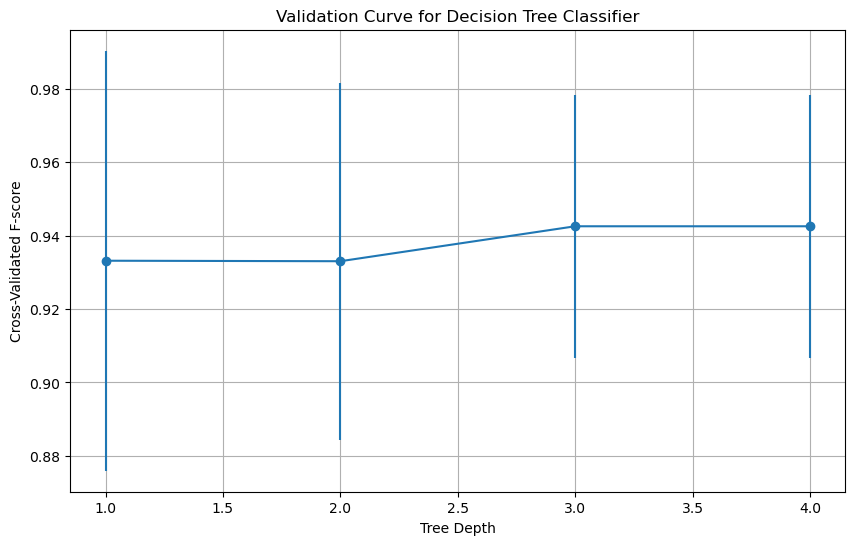

In [80]:
plt.figure(figsize=(10, 6))
plt.errorbar(depths, mean_test_scores, yerr=std_test_scores, fmt='-o')
plt.xlabel('Tree Depth')
plt.ylabel('Cross-Validated F-score')
plt.title('Validation Curve for Decision Tree Classifier')
plt.grid(True)
plt.show()